<a href="https://colab.research.google.com/github/Mounika-Alwar/Neuro-Style-Transfer/blob/main/Neuro_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [3]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [5]:
import os
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  file_path = os.path.join('/content',filename)
  print('File path: {}'.format(file_path))

Saving content.jpeg to content.jpeg
File path: /content/content.jpeg


In [6]:
uploaded = files.upload()

for filename in uploaded.keys():
  file_path = os.path.join('/content',filename)
  print('File path: {}'.format(file_path))

Saving style.jpeg to style.jpeg
File path: /content/style.jpeg


In [9]:
content_image = load_image('/content/content.jpeg')
style_image = load_image('/content/style.jpeg')

In [10]:
content_image.shape

TensorShape([1, 270, 190, 3])

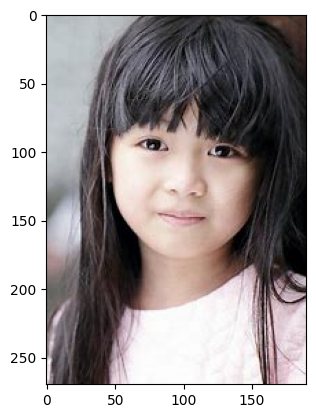

In [12]:
plt.imshow(np.squeeze(content_image))
plt.show()

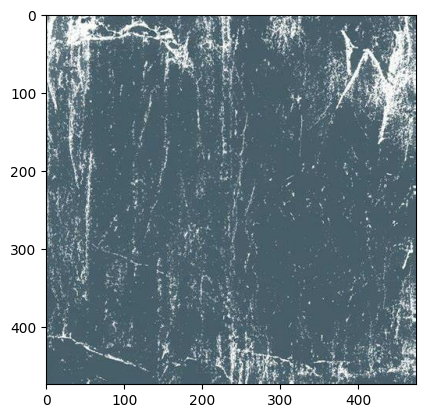

In [13]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [14]:
stylized_image = model(tf.constant(content_image),tf.constant(style_image))

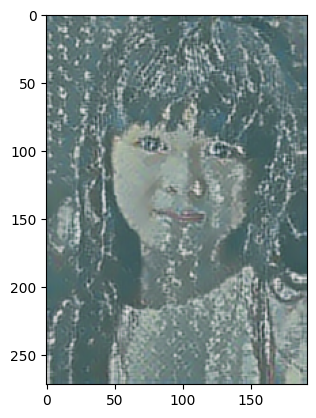

In [16]:
plt.imshow(np.squeeze(stylized_image))
plt.show()